![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and Pedro Angelo Medeiros Fonini
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from jupyterthemes import jtplot as jt
jt.style(theme="gruvboxd")

# Encontrando os 2 maiores autovalores de uma matriz

## Questão 1: Iterando

Escreva abaixo a função `power_iter2`, que itera um **par** de vetores $u$ e $v$ pela matriz $A$,
para calcular os 2 maiores autovalores (em módulo) de $A$, e retorna:
- a lista de estimativas do maior autovalor $\lambda_1$;
- a lista de estimativas do segundo maior autovalor $\lambda_2$;
- a lista de estimativas do autovetor correspondente a $\lambda_1$; e
- a lista de estimativas do autovetor correspondente a $\lambda_2$.

In [3]:
def power_iter2(A, tol=1e-6, maxiter=1000):
    n,m = np.shape(A)
    assert n==m, 'A must be square'
    est_aut1 = []
    est_aut2 = []
    est_vec1 = []
    est_vec2 = [] 
    err_abs_vec1 = 10*tol
    err_abs_vec2 = 10*tol
    #chutes iniciais
    chute_vec1 = np.ones(n)
    chute_vec2 = np.arange(-1,n-1,1)
    #autovetor 1
    new_vec1 = A @ chute_vec1
    vec1_i = np.true_divide(new_vec1,np.linalg.norm(new_vec1))
    est_vec1.append(np.true_divide(vec1_i,np.max(vec1_i)))
    #autovetor2
    new_vec2 = (A @ chute_vec2 - (np.dot(A @ chute_vec2,vec1_i) * vec1_i))
    vec2_i = np.true_divide(new_vec2,np.linalg.norm(new_vec2))
    est_vec2.append(np.true_divide(vec2_i,np.max(vec2_i)))
    #autovalor1
    aut_ant_vec1 = np.dot(new_vec1,chute_vec1)
    est_aut1.append(aut_ant_vec1)
    #autovalor2
    aut_ant_vec2 = np.dot(new_vec2,chute_vec2)
    est_aut2.append(aut_ant_vec2)
    i = 1
    while i < maxiter and (err_abs_vec1 > tol or err_abs_vec2 > tol):
        #iterando para maior autovec1lor
        #autovetor1
        new_vec1 = A @ vec1_i
        est_vec1.append(np.true_divide(new_vec1,np.max(np.abs(new_vec1))))
        #autovalor1
        aut_vec1 = np.dot(new_vec1,vec1_i)
        est_aut1.append(aut_vec1)
        #erros
        err_abs_vec1 = np.abs((aut_vec1-aut_ant_vec1)/aut_vec1)
        #recursivivo1
        aut_ant_vec1 = aut_vec1
        vec1_i = np.true_divide(new_vec1,np.linalg.norm(new_vec1))
        #iterando para segundo maior autovec1lor
        #autovetor2
        aux = A @ vec2_i
        new_vec2 = (aux - (np.dot(aux,vec1_i) * vec1_i))
        est_vec2.append(np.true_divide(new_vec2,np.max(np.abs(new_vec2))))
        #autovalor2
        aut_vec2 = np.dot(new_vec2,vec2_i)
        est_aut2.append(aut_vec2)
        #recursivo2
        err_abs_vec2 = np.abs((aut_vec2-aut_ant_vec2)/aut_vec2)
        aut_ant_vec2 = aut_vec2
        vec2_i = np.true_divide(new_vec2,np.linalg.norm(new_vec2))       
        i += 1
    return est_aut1, est_aut2,est_vec1,est_vec2


Testando que tudo está funcionando corretamente:

In [4]:
A = [[1,2],[3,9]]
l1s, l2s, v1s, v2s = power_iter2(A)

assert len(l1s) == len(l2s)
assert len(l1s) == len(v1s)
assert len(l2s) == len(v2s)

In [5]:
A = [[1,2],[3,9]]
l1s, l2s, v1s, v2s = power_iter2(A, tol=1e-9)

l2, l1 = sorted(np.linalg.eigvals(A))
assert np.isclose(l1s[-1], l1)
assert np.isclose(l2s[-1], l2)

In [6]:
A = [[1,2,3],[4,5,6],[7,8,9]]
l1s, l2s, v1s, v2s = power_iter2(A, tol=1e-9)

l2, l3, l1 = sorted(np.linalg.eigvals(A))
assert np.isclose(l1s[-1], l1)
assert np.isclose(l2s[-1], l2)

In [7]:
np.random.seed(4321)
A = np.random.rand(6,6)

r = power_iter2(A, tol=1e-6)
lens_6 = [len(x) for x in r]
r = power_iter2(A, tol=1e-10)
lens_10 = [len(x) for x in r]

assert np.all(lens_6 < lens_10)
assert np.all(np.equal(lens_6, lens_6[0]))
assert np.all(np.equal(lens_10, lens_10[0]))

## Questão 2: Mais testes

Que outro teste pode ser feito com os valores de retorno de `power_iter2`,
válidos para matrizes simétricas quaisquer (ou seja, geradas a partir de `np.random`)?

Explique a ideia do seu teste abaixo, e dê um exemplo de uso na caixa seguinte.

YOUR ANSWER HERE

## Questão 3: Gráficos

Considere a matriz $M$ abaixo.

In [8]:
np.random.seed(123)
M = np.random.rand(6,6)

Faça um gráfico do erro (absoluto) das estimativas dos dois maiores autovalores de $M$,
em função do número de iterações feitas.

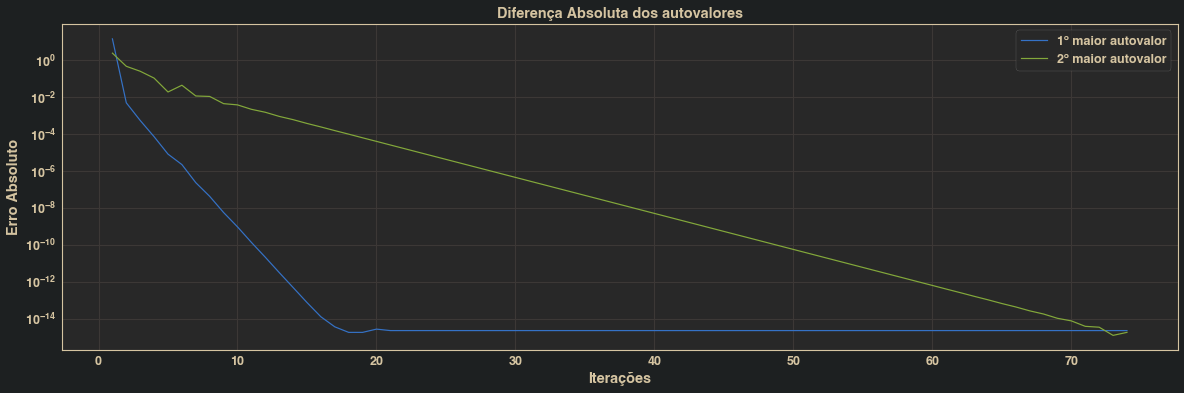

In [9]:
# YOUR CODE HERE
aut1,aut2,_,_ = power_iter2(M, tol=1e-14)
estimativa = [aut1,aut2]
aut_real = list(np.linalg.eigvals(M))

plt.figure(figsize=(20,6))
Eixo_x = np.arange(1,len(aut1)+1)

w = 1
for aut in estimativa:
    err_abs = []
    for x in range(len(aut1)):
        err_abs.append(np.abs(aut[x] - aut_real[w-1]))
    plt.semilogy(Eixo_x,err_abs,label=f"{w}º maior autovalor")
    w +=1
    
plt.title("Diferença Absoluta dos autovalores")
plt.legend();
plt.xlabel("Iterações")
plt.ylabel("Erro Absoluto")

    
ax = plt.gca()
plt.show()

In [10]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.get_legend().get_texts()) == 2

In [11]:
for l in ax.lines:
    ymin = min(l.get_ydata())
    assert 0 <= ymin < 1e-14

In [12]:
ax = None

Qual autovalor converge mais rápido?
Porque?

Use a primeira caixa para fazer cálculos que julgar necessário, e a segunda para a resposta e explicação.

Podemos observar que o maior autovalor possui uma convergêcia mais rápida, convergendo para a mesma ordem de tolerância desejada antes da 20ª iteração.

Para o segundo o maior autovalor, pode-se observar uma velocidade linear até a precisão desejada. Isto se dá pois.....

## Questão 4: Falhas do método da potência

Dê uma matriz $M$ para a qual o método da potência
- converge para o maior autovalor
- mas não converge para o segundo maior autovalor, em 1000 iterações,

e faça gráficos que deixem isso claro.

Não esqueça de título, legenda, etc. ;-)

In [13]:
Mteste=[[0.0,0.0,10.0],[0.0,20,0.0],[5,0.0,0.0]]
ans = list(np.linalg.eigvals(Mteste))
ans

[7.071067811865476, -7.071067811865475, 20.0]

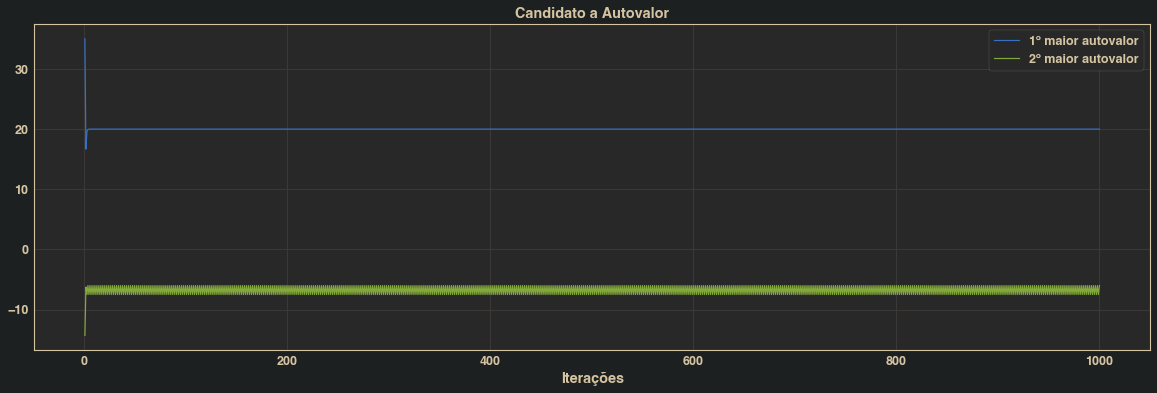

In [14]:
# YOUR CODE HERE
a1,a2,_,_ = power_iter2(Mteste, tol=1e-14)
Eixo_x = np.arange(1,len(a1)+1)

plt.figure(figsize=(20,6))
plt.plot(Eixo_x,a1,label=f"1º maior autovalor")
plt.plot(Eixo_x,a2,label=f"2º maior autovalor")

plt.title("Candidato a Autovalor")
plt.legend();
plt.xlabel("Iterações")

    
ax = plt.gca()
plt.show()

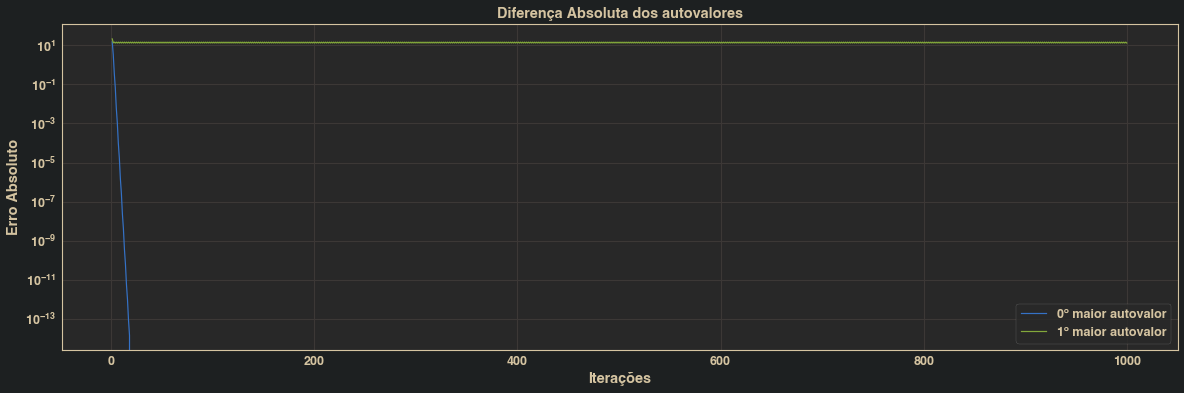

In [15]:
est = [a1,a2]
ans = list(np.linalg.eigvals(Mteste))

plt.figure(figsize=(20,6))
Eixo_x = np.arange(1,len(a1)+1)

w = 0
for aut in est:
    err_abs = []
    for x in range(0,len(a1)):
        err_abs.append(np.abs(aut[x] - ans[w-1]))
    plt.semilogy(Eixo_x,err_abs,label=f"{w}º maior autovalor")
    w +=1
    
plt.title("Diferença Absoluta dos autovalores")
plt.legend();
plt.xlabel("Iterações")
plt.ylabel("Erro Absoluto")


    
ax = plt.gca()
plt.show()

In [16]:
a1,a2,_,_ = power_iter2(Mteste, tol=1e-14)
ans = list(np.linalg.eigvals(Mteste))

print([np.abs(a1[i] - ans[-1]) for i in range(0,99)])

[15.0, 3.3333333333333286, 0.3787878787878789, 0.06802721088435248, 0.006100536847245763, 0.00106803374986697, 9.536670405196901e-05, 1.6689280641912774e-05, 1.4901159417490817e-06, 2.6077031378690663e-07, 2.3283064365386963e-08, 4.0745362639427185e-09, 3.637978807091713e-10, 6.366462912410498e-11, 5.6843418860808015e-12, 9.947598300641403e-13, 8.881784197001252e-14, 1.4210854715202004e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Agora, explique porque isso aconteceu.
Se fossem realizadas mais iterações, o seu exemplo convirgiria?

Não, pois é perceptivel que não há como fugir das ocilações entre os dois valores já que o maior autovetor já não muda mais.

Agora, dê uma matriz que tenha o comportamento oposto:
- convergindo, com uma quantidade suficiente de iterações (ou seja, só "faltou tempo")
- não convergindo, independente do número de iterações feitas (ou seja, tem algo "a mais")

In [17]:
#converge com muitas iterações, matriz não diagonalizável
M = [[1.0,0.0,0.0],[1.0,1.0,0.0],[0.0,0.0,2.0]]

aut1, aut2, _,_ = power_iter2(M, tol=1e-14,maxiter=1500)
print(aut1[-1])
print(aut2[-1])
print(len(aut2))

print(aut2)

2.0
1.0006668886663947
1500
[2.8888888888888893, 1.6741654571843252, 1.4935085623257667, 1.3358384910109051, 1.2403169103681881, 1.186211749589375, 1.1537157522601926, 1.1321075143243022, 1.1163856757990274, 1.104214874410479, 1.0944135931557335, 1.0863132637627255, 1.079493974448794, 1.0736706338821593, 1.0686392771859103, 1.0642487680975534, 1.0603842813328066, 1.0569568804919152, 1.0538965782231344, 1.0511475413660123, 1.0486646885324513, 1.0464112250692639, 1.044356826030522, 1.0424762765498061, 1.0407484407490182, 1.0391554702496764, 1.0376821898329607, 1.0363156157147688, 1.035044574239167, 1.0338593974175048, 1.0327516778523493, 1.0317140699723133, 1.0307401276897612, 1.029824170932562, 1.0289611752360963, 1.0281466798810708, 1.0273767110444403, 1.026647717178895, 1.0259565144109217, 1.0253002401921538, 1.0246763137852246, 1.0240824024372555, 1.0235163923087562, 1.022976363396276, 1.022460567823344, 1.0219674109837056, 1.0214954351092103, 1.021043304906413, 1.020609794964411, 1.